In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
sns.set()

In [2]:
xlxs = pd.ExcelFile('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件1.xls')
df = pd.read_excel(xlxs, index_col=0)
df.head()

,y,x1,x2,x3,x4,x5,x6
Number,,,,,,,
1,0,63.91,50.34,0,0.3662,0.348837,1
2,1,61.17,37.70,1,0.5724,1.027907,3
3,0,41.73,35.35,1,0.4845,0.953256,3
4,1,67.90,28.41,1,0.5242,0.941395,1
5,0,52.53,42.39,1,0.5431,0.878837,4


In [3]:
df = df.drop(6330)

In [4]:
df.tail()

,y,x1,x2,x3,x4,x5,x6
Number,,,,,,,
6325,1,63.07,52.74,1,0.4574,0.945349,2
6326,1,52.63,43.20,1,0.4574,1.024651,2
6327,1,59.05,54.98,1,0.4062,0.793256,1
6328,1,74.65,40.46,0,0.3818,1.274419,1
6329,1,44.68,52.24,1,0.6660,0.772326,3


In [5]:
df['y'] = df['y'].astype('float')

In [6]:
df.corr(method='pearson')

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.068390,-0.010323,0.035324,0.010327,0.043842,0.079281
x1,0.068390,1.000000,-0.185243,-0.042787,-0.355463,0.038287,-0.226973
x2,-0.010323,-0.185243,1.000000,0.056462,-0.001814,0.020345,0.065047
x3,0.035324,-0.042787,0.056462,1.000000,0.048677,0.351992,0.041100
x4,0.010327,-0.355463,-0.001814,0.048677,1.000000,-0.181858,0.376229
x5,0.043842,0.038287,0.020345,0.351992,-0.181858,1.000000,0.194749
x6,0.079281,-0.226973,0.065047,0.041100,0.376229,0.194749,1.000000


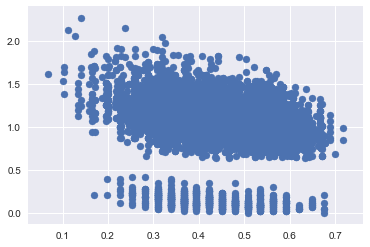

In [8]:
plt.scatter(df['x4'],df['x5'])

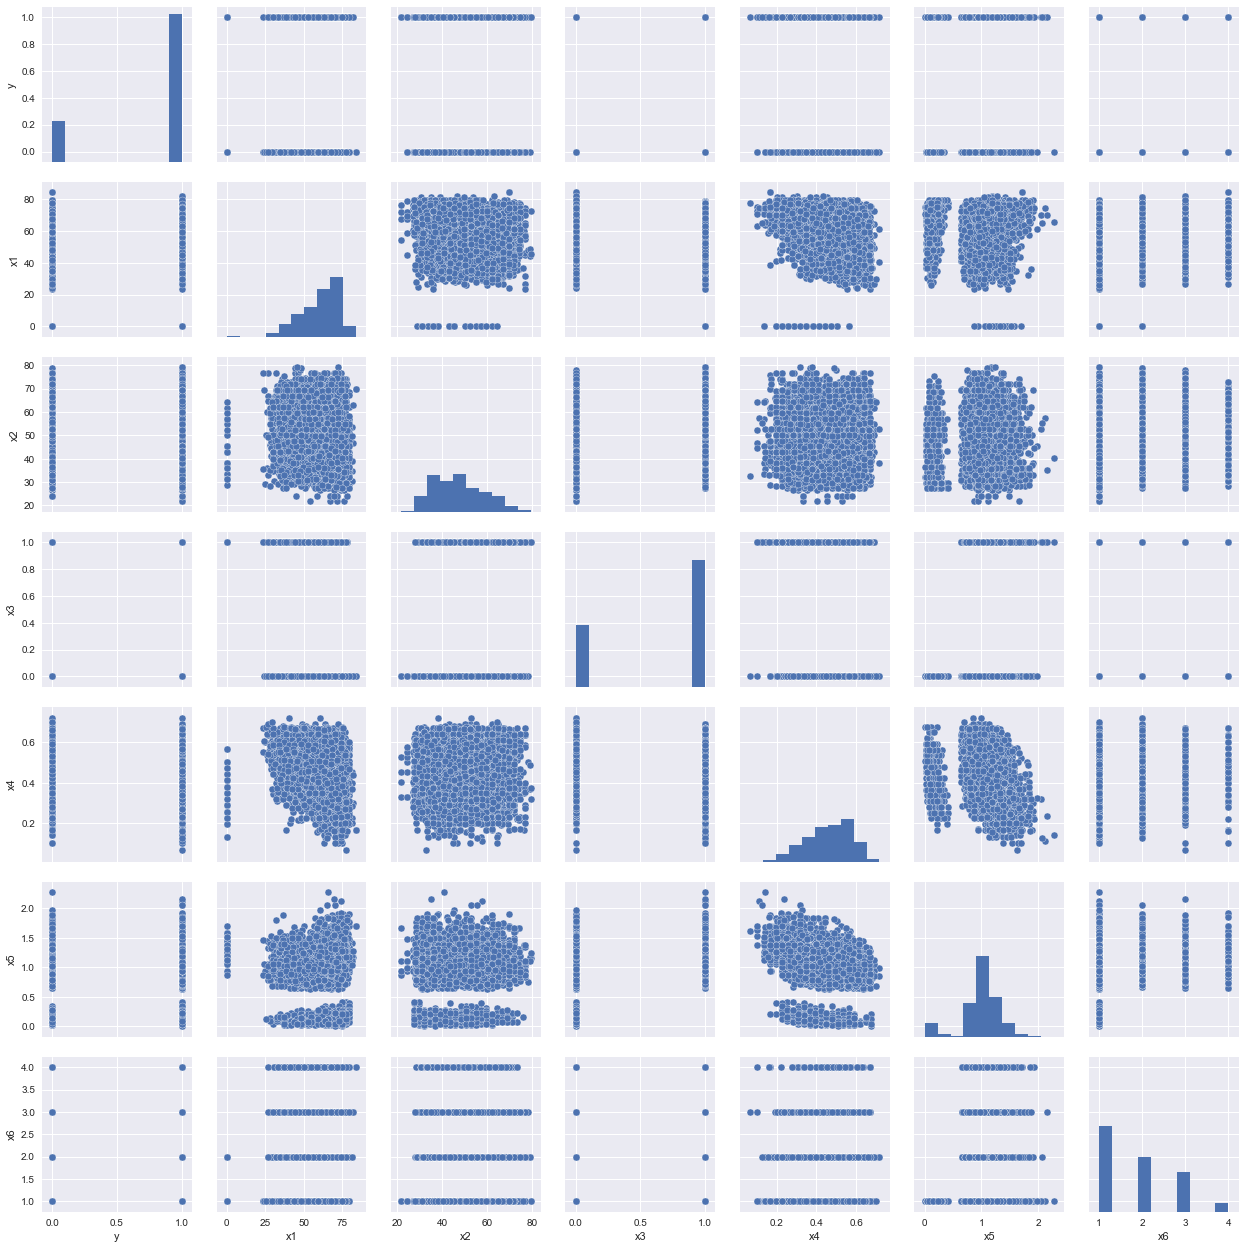

In [7]:
# 画出全部列的散点图
sns.pairplot(df.dropna())

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


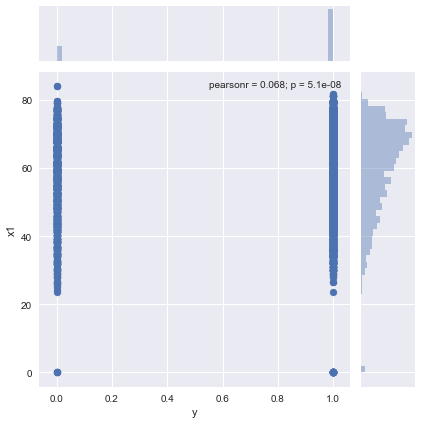

In [8]:
sns.jointplot('y','x1',df, kind='scatter')

In [9]:
min(df['x6'])

1

In [10]:
max(df['x6'])

4

In [11]:
g = df.groupby(df['x6'])

In [12]:
g.groups

{1: Int64Index([   1,    4,    7,    9,   13,   15,   18,   19,   26,   39,
             ...
             6309, 6310, 6311, 6314, 6315, 6319, 6321, 6324, 6327, 6328],
            dtype='int64', name='Number', length=2868),
 2: Int64Index([  16,   17,   20,   21,   22,   23,   24,   27,   30,   31,
             ...
             6296, 6307, 6308, 6313, 6316, 6320, 6322, 6323, 6325, 6326],
            dtype='int64', name='Number', length=1822),
 3: Int64Index([   2,    3,    6,    8,   10,   14,   28,   29,   32,   33,
             ...
             6278, 6281, 6285, 6291, 6292, 6293, 6301, 6317, 6318, 6329],
            dtype='int64', name='Number', length=1335),
 4: Int64Index([   5,   11,   12,   25,   56,   57,   65,  108,  109,  118,
             ...
             5992, 6001, 6028, 6053, 6237, 6243, 6288, 6289, 6298, 6312],
            dtype='int64', name='Number', length=304)}

In [13]:
list(g)

[(1,           y     x1     x2  x3      x4        x5  x6
  Number                                             
  1       0.0  63.91  50.34   0  0.3662  0.348837   1
  4       1.0  67.90  28.41   1  0.5242  0.941395   1
  7       1.0  75.15  48.05   0  0.6479  0.093023   1
  9       1.0  77.89  48.48   1  0.3685  1.024419   1
  13      0.0  26.59  50.12   0  0.5494  1.062326   1
  15      1.0  77.89  32.39   1  0.3685  1.160000   1
  18      0.0  68.40  61.81   0  0.3380  0.209302   1
  19      1.0  74.54  30.82   1  0.4357  1.237674   1
  26      1.0  70.65  43.46   0  0.3380  0.255814   1
  39      0.0  61.26  54.98   1  0.4357  0.941395   1
  41      1.0  41.35  57.39   1  0.1997  1.237674   1
  42      1.0  75.15  38.88   0  0.2817  0.093023   1
  44      1.0  73.34  39.29   1  0.3941  1.634651   1
  45      1.0  70.65  50.34   0  0.3380  0.069767   1
  48      1.0  66.12  59.48   1  0.2578  1.191628   1
  49      0.0  50.20  57.39   1  0.3472  0.867209   1
  51      1.0  54.62  52.

In [27]:
for i,df_x in list(g):
    print(df_x.corr(method='kendall'))

           y        x1        x2        x3        x4        x5   x6
y   1.000000  0.148317 -0.021930  0.032545 -0.043620  0.027918  NaN
x1  0.148317  1.000000 -0.151408 -0.010785 -0.240521  0.135173  NaN
x2 -0.021930 -0.151408  1.000000  0.070357 -0.039111 -0.012673  NaN
x3  0.032545 -0.010785  0.070357  1.000000 -0.040976  0.367697  NaN
x4 -0.043620 -0.240521 -0.039111 -0.040976  1.000000 -0.216974  NaN
x5  0.027918  0.135173 -0.012673  0.367697 -0.216974  1.000000  NaN
x6       NaN       NaN       NaN       NaN       NaN       NaN  1.0
           y        x1        x2        x3        x4        x5   x6
y   1.000000  0.051085 -0.014670  0.012991 -0.002737 -0.017167  NaN
x1  0.051085  1.000000 -0.119787 -0.045423 -0.235459  0.183679  NaN
x2 -0.014670 -0.119787  1.000000  0.039188  0.011210 -0.032642  NaN
x3  0.012991 -0.045423  0.039188  1.000000  0.105891 -0.002687  NaN
x4 -0.002737 -0.235459  0.011210  0.105891  1.000000 -0.273384  NaN
x5 -0.017167  0.183679 -0.032642 -0.002687 -0.27

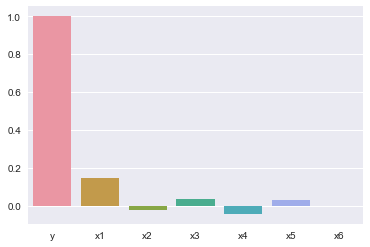

In [28]:
g_list = list(g)
s = g_list[0][1].corr(method='kendall')['y']
sns.barplot(x=s.index, y=s.values)

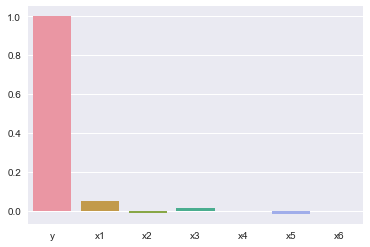

In [29]:
g_list = list(g)
s = g_list[1][1].corr(method='kendall')['y']
sns.barplot(x=s.index, y=s.values)

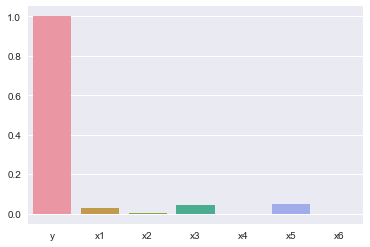

In [30]:
g_list = list(g)
s = g_list[2][1].corr(method='kendall')['y']
sns.barplot(x=s.index, y=s.values)

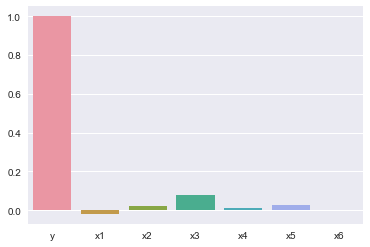

In [31]:
g_list = list(g)
s = g_list[3][1].corr(method='kendall')['y']
sns.barplot(x=s.index, y=s.values)

In [32]:
data = DataFrame([df['x1'],df['x3'],df['x5'],df['x6']]).T

In [33]:
y = DataFrame([df['y']])

In [34]:
data.shape

(6329, 4)

In [35]:
y.shape

(1, 6329)

In [36]:
data = data.values

In [37]:
y = y.values

In [38]:
y

array([[0., 1., 0., ..., 1., 1., 1.]])

In [39]:
y = y[0]

In [40]:
y

array([0., 1., 0., ..., 1., 1., 1.])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y)

In [42]:
xlxs = pd.ExcelFile('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件2.xlsx')
df = pd.read_excel(xlxs, index_col=0)
df.head()

,y,x1,x2,x3,x4,x5,x6
Number,,,,,,,
1,.,67.90,54.98,1,0.3472,1.015349,1
2,.,61.90,50.02,1,0.5040,0.999767,1
3,.,60.47,41.27,0,0.5566,0.891628,3
4,.,70.11,57.39,1,0.3472,0.867209,1
5,.,65.49,54.13,1,0.4845,1.027907,3


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
standarScaler = StandardScaler()

In [45]:
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
standarScaler.mean_

array([60.33840287,  0.67214496,  1.00063564,  1.84344711])

In [47]:
standarScaler.scale_ # 方差(数据分布范围)

array([12.77727936,  0.46943169,  0.32900023,  0.90890166])

In [48]:
X_train = standarScaler.transform(X_train)

In [49]:
X_test_standar = standarScaler.transform(X_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test_standar, y_test)

0.7188881869867341

In [51]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors' : [i for i in range(1,11)],
        'p' : [i for i in range(1, 6)]
    }
]

In [52]:
knn_clf = KNeighborsClassifier()
# 导入网格包搜索的模块GridSearchCV
from sklearn.model_selection import GridSearchCV
# 传入训练模型，参数集
grid_search = GridSearchCV(knn_clf, param_grid)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [55]:
grid_search.best_score_ 

0.7678044669195112

In [56]:
knn_clf = grid_search.best_estimator_

In [57]:
knn_clf.score(X_test_standar, y_test)

0.7586860391661402

In [59]:
DataFrame(X_train).corr()

,0,1,2,3
0,1.000000,-0.051993,0.029473,-0.210397
1,-0.051993,1.000000,0.352950,0.038225
2,0.029473,0.352950,1.000000,0.200122
3,-0.210397,0.038225,0.200122,1.000000


## 梯度下降

In [13]:
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [14]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Wall time: 355 ms


0.7777245488212694

In [26]:
sgd_reg = SGDRegressor(n_iter = 10000)
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Wall time: 485 ms


0.8008823433051541

In [27]:
sgd_reg.predict(X_test_standard)

array([18.05282616, 25.41226076, 12.84563355, 32.93604875, 24.44164624,
        2.26802115, 26.64688745, 31.64009581, 14.02546824, 24.54300894,
       14.78826917, 10.53960322, 30.06339713, 16.35818362, 23.91386916,
       25.407272  , 18.82979867, 23.90256422, 28.82557445, 27.04454834,
       12.72437081, 27.03084786, 26.16818807, 22.8721393 , 20.87911592,
       32.07393471, 14.78405918, 20.41421179, 12.88979559, 30.18626349,
       35.56293184,  5.20015083, 13.11893281, 35.87430354, 16.01324377,
       21.27581648, 12.56561833, 29.39047859, 27.48994659, 24.00699894,
       14.09755822, 23.44967682, 11.15782893, 22.33219271, 18.60323859,
       16.38361828, 24.93225653, 33.2946191 , 19.11810366, 27.23489574,
       18.08188248, 14.88436057, 25.26406167, 16.19022605, 21.67433425,
       16.25367553, 24.08405803, 11.70952498, 27.95989719, 30.87182469,
       19.7029591 , 24.8225441 , 25.91095217, 12.2361864 , 16.72876903,
       27.26997315, 22.49648631, 22.1867748 , 31.51974592, 13.96

## 主成分分析法 PCA

In [28]:
#### 一个非监督的机器学习算法
#### 主要用于数据的降维
#### 通过降维，可以发现更便于人类理解的特征
#### 其他应用：可视化；去噪